In [150]:
import tweepy
import time
import datetime
import re
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import nltk



consumerKey = "KngwG7xjI9d02XVD0HwRWJsf4"
consumerSecret ="xn9umFPHEZxbYZYucZgqVRPHlVjMmJxn2zyz3pM8Ly2TDz8LWu"
accessToken = "91827016-zAjwr3eUqmzDwStjwK3MD0gjTDRt3vJpFxgvGF3M5"
accessTokenSecret = "bAKY8bF3XW9kEoc7N96BZFkDiV8gXm1CMhyP7Pa3X70WO"


#Define a funtion to extract tweets between two given dates from a user's timeline


def extract_tweets(username,startDate,endDate):
    auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
    auth.set_access_token(accessToken, accessTokenSecret)
    api = tweepy.API(auth)
    
    #tmptweets is an array of tweet objects (json) from a specific user's timeline
    
    tmpTweets = api.user_timeline(username)
    
  
    #Tweets list will store all the tweet objects from a user's timeline
    
    Tweets=[]
    
    for tweet in tmpTweets:
        if tweet.created_at < endDate and tweet.created_at > startDate:
            Tweets.append(tweet)
            
    while (tmpTweets[-1].created_at > startDate):
        tmpTweets = api.user_timeline(username, max_id = tmpTweets[-1].id)
        for tweet in tmpTweets:
            if tweet.created_at < endDate and tweet.created_at > startDate:
                Tweets.append(tweet)
             
    #create an empty dict which has two keys : Tweets and Timestamp
    #Tweets key will store tweets in a list and Timestamp key will store corresponding datetime in a list  
    
    Data_set={}
    Data_set['Tweet']=[]
    Data_set['Timestamp']=[]
    Data_set['Retweet_Count']=[]
    Data_set['Likes']=[]
    Data_set['Language']=[]
    
    for tweet in Tweets:
        Data_set['Tweet'].append(tweet.text)
        Data_set['Timestamp'].append(tweet.created_at)
        Data_set['Retweet_Count'].append(tweet.retweet_count)
        Data_set['Likes'].append(tweet.favorite_count)
        Data_set['Language'].append(tweet.lang)
        
    #convert the Data_dict dictionary to pandas Dataframe
    
    df=pd.DataFrame.from_dict(Data_set)
                
    return df
    


In [219]:
from spacy.lang.tr.stop_words import STOP_WORDS as stopwords_turkish
from spacy.lang.en.stop_words import STOP_WORDS as stopwords_english
from spacy.lang.de.stop_words import STOP_WORDS as stopwords_deutsch



stop_words=stop_words+ more_stopwords

hindi=[]

#Jha, Vandana; N, Manjunath; Shenoy, P Deepa; K R, Venugopal (2018),
#“Hindi Language Stop Words List”, Mendeley Data, V1, doi: 10.17632/bsr3frvvjc.1

with open('.\hindi.txt',encoding='utf-8') as file:  
    line=file.read()
    

stopwords_hindi=line.split()

more_stopwords=['erdoÄŸan','merkel','modi','bjp','cdp','akp','hÃ¼kÃ¼met','gsyä°h','government','govt','regierung','wirtschaft',
                'corona','covid','economy','ekonomi','keyword','जी','है।','है,','ji','shri','ji.','जी','हैं।','pm','india’s','day',
                'जी।','बहुत-बहुत','हर','लोगों','rt']

stopwords=list(stopwords_english)+list(stopwords_deutsch)+list(stopwords_turkish)+stopwords_hindi+more_stopwords

In [199]:
print(stopwords)

['thence', 'go', 'most', 'however', 'first', 'throughout', 'into', 'five', 'these', 'am', 'forty', 'per', 'top', 'becomes', 'name', 'what', 'those', 'above', 'six', 'under', 'become', 'something', 'just', 'latter', 'when', 'yourselves', 'doing', 'formerly', 'my', 'please', 'everything', 'n’t', 'around', 'himself', 'quite', 'perhaps', 'too', 'onto', 'might', 'will', 'among', 'often', 'cannot', 'or', 'where', 'their', 'using', 'own', 'is', 'here', 'but', 'beside', 'move', 'same', 'although', 'whom', 'thus', 'can', 'almost', 'hereupon', 'moreover', 'ourselves', 'eleven', 'of', 'very', 'any', 'see', 'who', '’d', 'behind', 'its', 'two', 'anyone', 'hence', 'to', 'again', 'amongst', 'may', '‘re', 'thereafter', 'keep', 'do', 'least', 'between', 'whereby', 'you', '‘m', 'sometimes', 'next', 'within', '’re', 'therefore', 'we', 'therein', 'ca', 'third', "'m", 'yourself', 'nevertheless', 'during', 'empty', 'us', 'herself', 'has', 'get', 'never', 'three', 'both', 'say', '‘d', 'over', 'seem', 'eight'

In [42]:

startDate = datetime.datetime(2020, 1, 1, 0, 0, 0)
endDate =   datetime.datetime(2021,1, 10, 0, 0, 0)

usernames = ['@RTErdogan','@narendramodi']



In [43]:
erdogan=extract_tweets(usernames[0],startDate,endDate)
modi=extract_tweets(usernames[1],startDate,endDate)

In [44]:
erdogan

,Tweet,Timestamp,Retweet_Count,Likes,Language
0,"My treasured friend @ZelenskyyUa, we are pleas...",2021-01-09 13:48:03,6496,23501,en
1,Diyarbakır ve Elazığ başta olmak üzere bölgede...,2021-01-09 13:11:30,11391,41627,tr
2,Diyarbakır-Ergani-Elazığ Yolu Devegeçidi Köprü...,2021-01-09 11:22:44,8869,34910,tr
3,#Türksat5A uydumuz bu sabah başarılı bir şekil...,2021-01-08 13:02:23,14905,56754,tr
4,#Türksat5A uydumuzun uzaya fırlatılışı sonrası...,2021-01-08 11:27:27,8708,33174,tr
...,...,...,...,...,...
859,Milli İstihbarat Teşkilatı Yeni Hizmet Binasın...,2020-01-06 11:36:02,5959,26966,tr
860,RT @RTErdogan: CNN Türk-Kanal D Ortak Canlı Ya...,2020-01-05 19:13:46,5082,0,tr
861,CNN Türk-Kanal D Ortak Canlı Yayını\n\nhttps:/...,2020-01-05 18:16:51,5082,20544,tr
862,Şehir ve Güvenlik Sempozyumu https://t.co/t6T2...,2020-01-02 08:36:53,3312,16356,tr


In [45]:
modi

,Tweet,Timestamp,Retweet_Count,Likes,Language
0,Couldn’t agree more. They have always risen to...,2021-01-09 16:03:08,2831,17934,en
1,I admire your spirit! https://t.co/bkzM8DqVJk,2021-01-09 16:01:44,2875,23687,en
2,"If the world trusts India, one of the importan...",2021-01-09 12:10:05,4659,20201,en
3,Be it our tech industry or the pharma industry...,2021-01-09 12:09:41,4114,19077,en
4,The Indian diaspora has distinguished itself g...,2021-01-09 12:09:16,3304,13962,en
...,...,...,...,...,...
3303,Creation of the Department of Military Affairs...,2020-01-01 06:04:52,4936,27427,en
3304,"On 15th August 2019, from the ramparts of the ...",2020-01-01 06:04:13,4137,22379,en
3305,"As the first CDS takes charge, I pay homage to...",2020-01-01 06:03:31,5031,29130,en
3306,I am delighted that as we begin the new year a...,2020-01-01 06:02:53,8939,59802,en


<function matplotlib.pyplot.show(close=None, block=None)>

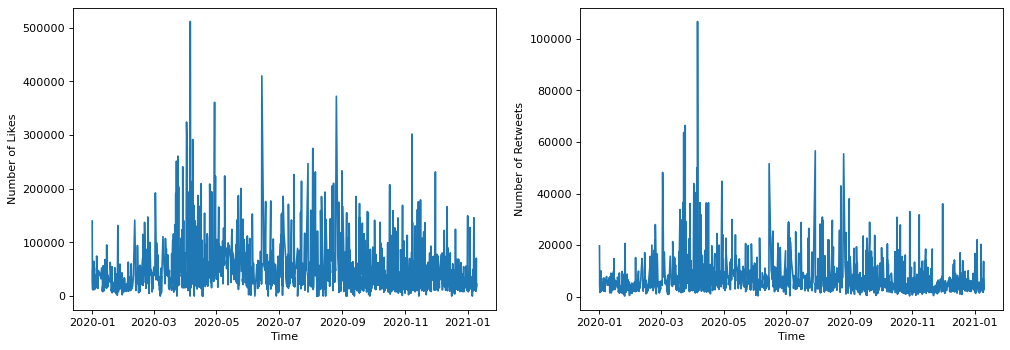

In [66]:
x_likes=[date for date in modi['Timestamp']]
y_likes=[likes for likes in modi['Likes']]

plt.figure(figsize=(15,5), dpi=80)

x_retweets=[date for date in modi['Timestamp']]
y_retweets=[retweet for retweet in modi['Retweet_Count']]
plt.subplot(1,2,1)
plt.plot(x_likes,y_likes)
plt.xlabel("Time")
plt.ylabel("Number of Likes")

plt.subplot(1,2,2)
plt.plot(x_retweets,y_retweets)
plt.xlabel("Time")
plt.ylabel("Number of Retweets")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

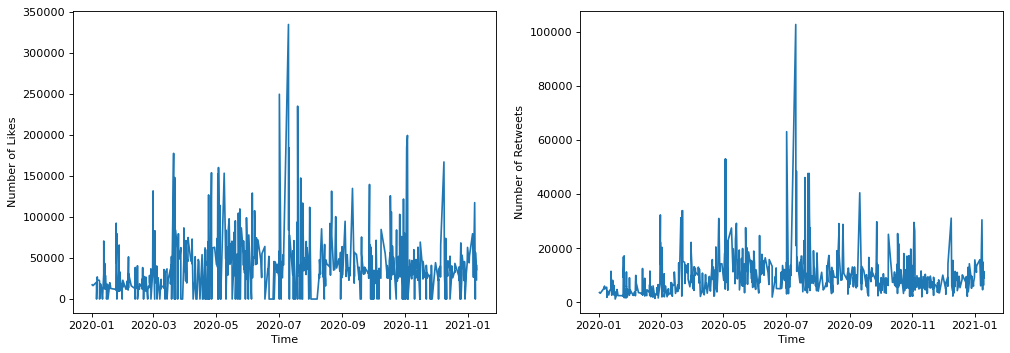

In [67]:
x_likes=[date for date in erdogan['Timestamp']]
y_likes=[likes for likes in erdogan['Likes']]

plt.figure(figsize=(15,5), dpi=80)

x_retweets=[date for date in erdogan['Timestamp']]
y_retweets=[retweet for retweet in erdogan['Retweet_Count']]
plt.subplot(1,2,1)
plt.plot(x_likes,y_likes)
plt.xlabel("Time")
plt.ylabel("Number of Likes")

plt.subplot(1,2,2)
plt.plot(x_retweets,y_retweets)
plt.xlabel("Time")
plt.ylabel("Number of Retweets")
plt.show

In [220]:
def words_freq_tweets(df):
    words_list=[]
    for tweet in df['Tweet']:
        for word in tweet.split():
            if word.lower() not in stopwords and word.startswith('https')!=True and word.startswith('@')!=True:
                words_list.append(word.lower())
                
    wordfreq = [words_list.count(w) for w in words_list]
    
    return dict(list(zip(words_list,wordfreq)))     
    
    
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux
        

In [221]:
words_modi=words_freq_tweets(modi)
words_erdogan=words_freq_tweets(erdogan)

In [222]:
most_used_words_modi=sortFreqDict(words_modi)
most_used_words_erdogan=sortFreqDict(words_erdogan)

more=['जी','है।','है,','ji','shri','ji.','जी','हैं।','pm','india’s','day','जी।','बहुत-बहुत','हर','लोगों']

In [223]:
#10 most used words in Modi's tweets

print(most_used_words_modi[:10])

[(227, 'india'), (174, 'thank'), (121, 'भारत'), (118, 'people'), (117, 'देश'), (101, 'बिहार'), (97, 'wishes'), (97, 'greetings'), (95, 'covid-19'), (80, 'great')]


In [224]:
#10 most used words in Erdogan's tweets

print(most_used_words_erdogan[:10])

[(126, 'bir'), (84, 'toplantısı'), (68, 'töreni'), (61, 'cumhurbaşkanı'), (51, 'ak'), (48, 'açılış'), (46, 'yıl'), (45, 'parti'), (43, 'sonrası'), (41, 'bugün')]
